In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import math
import time
from scipy.integrate import *
from scipy.sparse.linalg import spsolve

from matplotlib import cm
from scipy.optimize import fsolve
from scipy.optimize import curve_fit
import pripomocki.diffeq_2 as deq

import matplotlib
from cmath import *
from mpl_toolkits.mplot3d import Axes3D

# PADAJOČA VRV
## Zaključna naloga za ma-fi 2

### Formulacija problema
Desni konec vrvi naj bo fiksiran na visini $h_0 = 0$, lahko pa se prosto vrti

Levi konec je na zacetku na visini $h$ in ob casu $t = 0$ zacne padati

### Za zacetek samo 'viseci most'

In [2]:
P0 = np.array((0.0, 0.0))   # levo sidrisce
P1 = np.array((5.0, 1.0))   # desno sidrisce
L = 6    # dolzina vrvi
m = 3    # dolzinska gostota mase
g = 1   #teznostni pospesek
t = 10


d = abs(P0[0] - P1[0])
h = abs(P0[1] - P1[1])

if L <= np.sqrt(d**2 + h**2):
    print('Prekratka vrv')
else:
    pass


def catenary(a):
    return a * np.sinh(d/(2*a)) + np.arctanh(h/L) + a * np.sinh(d/(2*a)) - np.arctanh(h/L) - L

a = fsolve(catenary, 1) # najdemo tapravo krivuljo
print(f'a =', a)

d1 = a * (d/(2*a) + np.arctanh(h/L))
d0 = d - d1

if P1[1] >= P0[1]:
    xi = d0
    xf = d1

elif P1[1] < P0[1]:
    xi = d1
    xf = d0


x = np.linspace(-xi, xf, 500)
y = np.zeros_like(x)

y = a * np.cosh((x)/a)

h_max = a * (math.cosh(d1 / a) - 1)
print(h_max)

y = y - y[0]

a = [2.34770762]
[2.02284866]


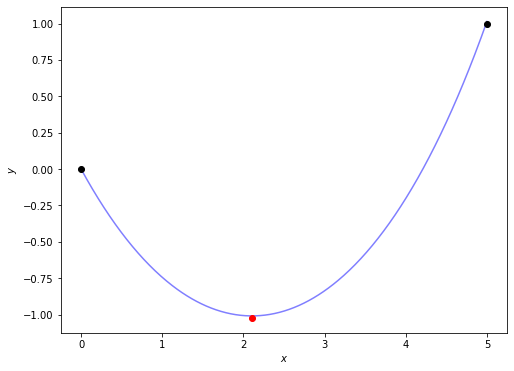

In [3]:
t = np.linspace(0, 10, 500)
cmap = plt.get_cmap('cool', len(t))
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 6), sharex=True)

axes.plot(x+xi, y, color=cmap(250))
axes.set_ylabel('$y$')

axes.plot(P0[0], P0[1], color='black', marker='o')
axes.plot(P1[0], P1[1], color='black', marker='o')
axes.plot(xi, max(P1[1], P0[1])-h_max, color='red', marker='o')

plt.xlabel('$x$')

plt.show()

##### Testiranje vseh robnih pogojev (nategnjen, vodoravno, vertikalno ...)

a = [2.34770762]
a = [2.28333137]
a = [2.22433195]
a = [2.17000745]
a = [2.1197776]
a = [2.07315795]
a = [2.02974046]
a = [1.98917867]
a = [1.95117627]
a = [1.91547817]
a = [1.88186335]
a = [1.85013931]
a = [1.82013745]
a = [1.79170944]
a = [1.76472414]
a = [1.73906518]
a = [1.71462886]
a = [1.69132242]
a = [1.66906265]
a = [1.6477746]
a = [1.62739062]
a = [1.60784942]
a = [1.58909536]
a = [1.57107779]
a = [1.55375045]
a = [1.53707107]
a = [1.52100088]
a = [1.50550424]
a = [1.4905484]
a = [1.47610309]
a = [1.46214041]
a = [1.44863448]
a = [1.43556135]
a = [1.42289877]
a = [1.41062603]
a = [1.39872387]
a = [1.38717432]
a = [1.37596059]
a = [1.36506699]
a = [1.35447884]
a = [1.34418235]
a = [1.33416461]
a = [1.32441347]
a = [1.31491751]
a = [1.30566599]
a = [1.29664878]
a = [1.2878563]
a = [1.27927956]
a = [1.27091]
a = [1.26273957]
a = [1.25476062]
a = [1.24696593]
a = [1.23934862]
a = [1.23190219]
a = [1.22462044]
a = [1.21749751]
a = [1.2105278]
a = [1.20370598]
a = [1.19702699]
a = [

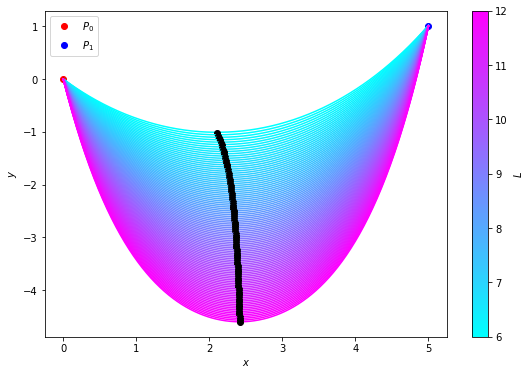

In [4]:
def stojeca_vrv(P0, P1, Lspace, m=3, g=1):


    d = abs(P0[0] - P1[0])
    h = abs(P0[1] - P1[1])

    for L in Lspace:
        if L < np.sqrt(d**2 + h**2):
            print('Prekratka vrv')
        else:
            pass

    y = np.zeros([len(Lspace), 500])
    h_max = np.zeros(len(Lspace))
    zamik = np.zeros(len(Lspace))

    for i in range(len(Lspace)):
        L = Lspace[i]

        def catenary(a):
            return a * np.sinh(d/(2*a)) + np.arctanh(h/L) + a * np.sinh(d/(2*a)) - np.arctanh(h/L) - L

        a = fsolve(catenary, 1) # najdemo tapravo krivuljo
        print(f'a =', a)

        d1 = a * (d/(2*a) + np.arctanh(h/L))
        d0 = d - d1

        if P1[1] >= P0[1]:
            xi = d0

        elif P1[1] < P0[1]:
            xi = d1



        x = np.linspace(P0[0], P1[0], 500)
    

        y[i] = a * np.cosh((x-xi)/a)

        h_max[i] = a * np.cosh(d1 / a) - a
        zamik[i] = xi

        y[i] = y[i] - y[i][0]


    cmap = plt.get_cmap('cool', len(Lspace))
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(9, 6), sharex=True)

    axes.set_ylabel('$y$')

    axes.plot(P0[0], P0[1], color='red', marker='o', label=r'$P_0$', linestyle='')
    axes.plot(P1[0], P1[1], color='blue', marker='o', label=r'$P_1$', linestyle='')
    

    for i in range(len(Lspace)):
        axes.plot(x, y[i], color=cmap(i))
        axes.plot(zamik[i], max(P1[1], P0[1])-h_max[i], color='black', marker='o')

    norm = matplotlib.colors.Normalize(vmin=Lspace[0], vmax=Lspace[-1])
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    fig.colorbar(sm, ax=axes, label=r'$L$')

    plt.xlabel('$x$')
    plt.legend()

    plt.savefig(f'grafi/catenary-L{Lspace[0]}-{Lspace[-1]}-P0{P0[0]}-{P0[1]}-P1{P1[0]}-{P1[1]}.pdf')
    plt.show()


P0 = np.array([0.0, 0.0])
P1 = np.array([5.0, 1.0])
Lspace = np.linspace(6, 12, 100)


stojeca_vrv(P0, P1, Lspace)

### Spustimo da desni konec pada

a = [2.34770762]
[2.02284866]
dolzina: 5.999999661238805
dolzina: 6.000000537837244
dolzina: 6.00000548108304
dolzina: 6.000018414066856
dolzina: 6.000044131274408
dolzina: 6.0000881181214725
dolzina: 6.000156386235211
dolzina: 6.000255321000557
dolzina: 6.0003915387131
dolzina: 6.000571751557377
dolzina: 6.000802639514868
dolzina: 6.001090729151433
dolzina: 6.001442279987481
dolzina: 6.001863179762639
dolzina: 6.002358850320207
dolzina: 6.0029341660174875
dolzina: 6.003593386497791
dolzina: 6.0043401053463334
dolzina: 6.005177215631173
dolzina: 6.006106892662652
dolzina: 6.007130593568592
dolzina: 6.008249072561238
dolzina: 6.009462410142367
dolzina: 6.010770054013954
dolzina: 6.012170869167672
dolzina: 6.013663194525401
dolzina: 6.015244903578902
dolzina: 6.016913466697194
dolzina: 6.018666013091904
dolzina: 6.020499390809476
dolzina: 6.022410223513784
dolzina: 6.024394963200493
dolzina: 6.026449938322535
dolzina: 6.028571397090479
dolzina: 6.03075554593727
dolzina: 6.032998583304852

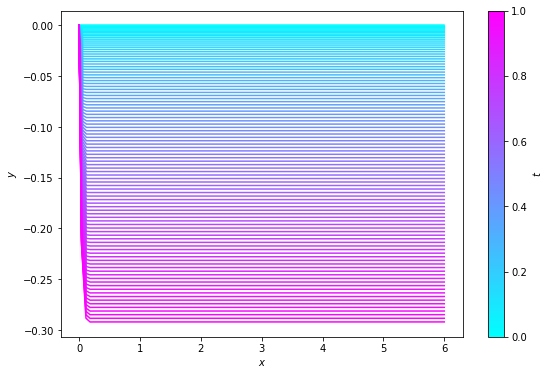

In [5]:
P0 = np.array((0.0, 0.0))   # levo sidrisce
P1 = np.array((5.0, 1.0))   # desno sidrisce
L = 6    # dolzina vrvi
m = 3    # dolzinska gostota mase
g = 1   #teznostni pospesek


d = abs(P0[0] - P1[0])
h = abs(P0[1] - P1[1])

if L <= np.sqrt(d**2 + h**2):
    print('Prekratka vrv')
else:
    pass


def catenary(a):
    return a * np.sinh(d/(2*a)) + np.arctanh(h/L) + a * np.sinh(d/(2*a)) - np.arctanh(h/L) - L

a = fsolve(catenary, 1) # najdemo tapravo krivuljo
print(f'a =', a)

d1 = a * (d/(2*a) + np.arctanh(h/L))
d0 = d - d1

if P1[1] >= P0[1]:
    xi = d0
    xf = d1

elif P1[1] < P0[1]:
    xi = d1
    xf = d0


x = np.linspace(-xi, xf, 500)
y = np.zeros_like(x)

y = a * np.cosh((x)/a)

h_max = a * (math.cosh(d1 / a) - 1) # Najnizja tocka
print(h_max)

Fx = m * a   # Napetost v horizontalni smeri ... konstantna cez cel strik
Fy = m * np.sinh(x)   # Napetsot v vertikalni smeri ... integral po striku v obe smeri od najniyje tocke


y = y - y[0]    # Vzpostavljeni zacetni pogoji y(x)




def premik_vrv(x, t):   # x oblike [x, y]
    return np.array([x[1], x])


n = 100  # Razclenitev strika na n tock, potem premikanje strika kot funkjcija najblizjih sosedov. Probam to catenary funkcijo reaclenit cim bolj enakomerno

tspace = np.linspace(0, 1, 100)
strik_x = np.zeros([len(tspace), n])
strik_y = np.zeros_like(strik_x)


l = L / n   # zeljena dolzina enega segmenta

strik1_x = np.zeros(n)
strik1_y = np.zeros(n)
strik2_x = np.zeros(n)
strik2_y = np.zeros(n)
velocity_x = np.zeros(n)
velocity_y = np.zeros(n)

beta = 0.95
gamma = 0.001

strik1_x = np.linspace(0, L, n)
strik1_y = np.zeros(n)

for i in range(len(tspace)):
    t = tspace[i]

    for j in range(n):
        if j == 0:
            strik2_x[j] = strik1_x[j]
            strik2_y[j] = strik1_x[j]
            velocity_x[j] = 0
            velocity_y[j] = 0
            '''

            vec2_x = strik1_x[j+1] - strik1_x[j]
            vec2_y = strik1_y[j+1] - strik1_y[j]
            d2 = np.sqrt(vec2_x**2 + vec2_y**2)
            e2 = d2 - l


            vx = vec2_x / d2
            vy = vec2_y / d2 - l * m

            velocity_x[j] = velocity_x[j] * beta + vx * gamma
            velocity_y[j] = velocity_y[j] * beta + vy * gamma

            strik2_x[j] = strik1_x[j] + velocity_x[j]
            strik2_y[j] = strik1_y[j] + velocity_y[j]'''


        elif j == n-1:
            vec1_x = strik1_x[j-1] - strik1_x[j]
            vec1_y = strik1_y[j-1] - strik1_y[j]
            d1 = np.sqrt(vec1_x**2 + vec1_y**2)
            e1 = d1 - l

            vx = vec1_x / d1 * e1
            vy = vec1_y / d1 * e1 - l * m

            velocity_x[j] = velocity_x[j] * beta + vx * gamma
            velocity_y[j] = velocity_y[j] * beta + vy * gamma

            strik2_x[j] = strik1_x[j] + velocity_x[j]
            strik2_y[j] = strik1_y[j] + velocity_y[j]


        else:
            vec1_x = strik1_x[j-1] - strik1_x[j]
            vec1_y = strik1_y[j-1] - strik1_y[j]
            d1 = np.sqrt(vec1_x**2 + vec1_y**2)
            e1 = d1 - l

            vec2_x = strik1_x[j+1] - strik1_x[j]
            vec2_y = strik1_y[j+1] - strik1_y[j]
            d2 = np.sqrt(vec2_x**2 + vec2_y**2)
            e2 = d2 - l


            vx = vec1_x / d1 * e1 + vec2_x / d2 * e2
            vy = vec1_y / d1 * e1 + vec2_y / d2 * e2 - l * m

            velocity_x[j] = velocity_x[j] * beta + vx * gamma
            velocity_y[j] = velocity_y[j] * beta + vy * gamma

            strik2_x[j] = strik1_x[j] + velocity_x[j]
            strik2_y[j] = strik1_y[j] + velocity_y[j]

    strik_x[i] = strik1_x
    strik_y[i] = strik1_y

    strik1_x = strik2_x
    strik1_y = strik2_y

    dolzina = 0
    for k in range(n-1):
        dx = abs(strik1_x[k] - strik1_x[k+1])
        dy = abs(strik1_y[k] - strik1_y[k+1])
        dolzina += np.sqrt(dx**2 + dy**2)
    print(f'dolzina:', dolzina)


cmap = plt.get_cmap('cool', len(tspace))
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(9, 6), sharex=True)

axes.set_ylabel('$y$')

#axes.plot(P0[0], P0[1], color='black', marker='o')
#axes.plot(P1[0], P1[1], color='black', marker='o')


for i in range(len(tspace)):
    axes.plot(strik_x[i], strik_y[i], color=cmap(i))
    #axes.plot(zamik[i], max(P1[1], P0[1])-h_max[i], color='red', marker='o')

norm = matplotlib.colors.Normalize(vmin=tspace[0], vmax=tspace[-1])
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
fig.colorbar(sm, ax=axes, label=r'$t$')

plt.xlabel('$x$')

plt.show()

    

#### Poskus z metodo runge-kutta 4. reda

enacba: $\sum_{j=1}^n m_{ij}c_{ij}\ddot{\varphi}_j + \sum_{j=1}^n m_{ij}s_{ij}\dot{\varphi_j}^2 + \frac{g}{l}q_ic_i$ = 0

In [5]:
from scipy.integrate import Radau
from scipy.integrate import solve_ivp
from scipy.integrate import solve_bvp

def M(n):
    M = np.zeros([n, n])
    for i in range(n):
        for j in range(n):
            if i == j:
                M[i, j] = n-i + 1/3
            else:
                M[i, j] = n-max(i, j) + 1/2
    return M


def MC(phi):
    n = len(phi)
    m = M(n)
    C = np.zeros_like(m)
    MC = np.zeros_like(m)
    for i in range(n):
        for j in range(n):
            C[i, j] = np.cos(phi[i]-phi[j])
            MC[i, j] = m[i, j] * C[i, j]
    return MC


def MS(phi):
    n = len(phi)
    m = M(n)
    C = np.zeros_like(m)
    MS = np.zeros_like(m)
    for i in range(n):
        for j in range(n):
            C[i, j] = np.sin(phi[i]-phi[j])
            MS[i, j] = m[i, j] * C[i, j]
    return MS


def qc(phi):
    n = len(phi)
    q = np.zeros_like(phi)
    for i in range(n):
        q[i] = (n - i + 0.5) * np.cos(phi[i])
    return q


def casovni_razvoj(t, omega):
    phi = sol[0, t]
    n = len(phi)
    mc = MC(phi)
    ms = MS(phi)
    q = qc(phi)

    inv = np.linalg.inv(mc)

    return - np.dot(inv, np.dot(ms, np.square(omega))) - np.dot(inv, q)



phi = np.zeros(25)
omega = np.zeros_like(phi)
alpha = np.zeros_like(phi)

timespace = np.linspace(0, 10, 1000)

sol = np.zeros([3, len(timespace), len(phi)])
sol[0, 0] = phi
sol[1, 0] = omega
sol[2, 0] = alpha


for t in range(len(timespace)-1):
    dt = timespace[t+1] - timespace[t]

    sol[0, t+1] = sol[0, t] + sol[1, t] * dt
    
    k1 = dt * casovni_razvoj(t, sol[1, t])
    k2 = dt * casovni_razvoj(t, sol[1, t] + 0.5 * k1)
    k3 = dt * casovni_razvoj(t+1, sol[1, t] + 0.5 * k2)
    k4 = dt * casovni_razvoj(t+1, sol[1, t] + k3)

    sol[1, t+1] = sol[1, t] + (k1 + 2.0 * (k2+k3) + k4) / 6.0

    sol[2, t+1] = (sol[1, t+1] - sol[1, t]) / dt

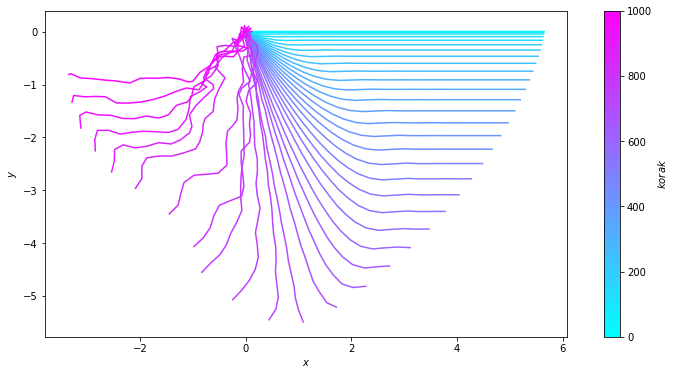

In [6]:
def x_iz_phi(phi, L):
    n = len(phi)
    l = L / n
    x = np.zeros(len(phi)+1)
    for i in range(n):
        x[i+1] = 0.5 * l * np.cos(phi[i])
        for j in range(1, i):
            x[i+1] += l * np.cos(phi[j])
    return x

def y_iz_phi(phi, L):
    n = len(phi)
    l = L / n
    y = np.zeros(len(phi)+1)
    for i in range(n):
        y[i+1] = 0.5 * l * np.sin(phi[i])
        for j in range(1, i):
            y[i+1] += l * np.sin(phi[j])
    return y

t = len(sol[0])

cmap = plt.get_cmap('cool', t)
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(13, 6), sharex=True)

axes.set_ylabel('$y$')

#axes.plot(P0[0], P0[1], color='red', marker='o', label=r'$P_0$', linestyle='')
#axes.plot(P1[0], P1[1], color='blue', marker='o', label=r'$P_1$', linestyle='')

freq = 25

for i in range(t//freq):
    x = x_iz_phi(sol[0, freq*i], L)
    y = y_iz_phi(sol[0, freq*i], L)
    axes.plot(x, y, color=cmap(freq*i))

norm = matplotlib.colors.Normalize(vmin=0, vmax=t)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
fig.colorbar(sm, ax=axes, label=r'$korak$')

plt.xlabel('$x$')
#plt.legend()
plt.gca().set_aspect('equal', adjustable='box')

plt.savefig(f'grafi/padvrv-n{len(phi)}-l{L/len(phi)}-dt{round(timespace[1]-timespace[0], 2)}-t{timespace[-1]}-freq{freq}.pdf')
plt.show()

#### Dodaten popravek da se strik leps obnasa

enacba: $\sum_{j=1}^n m_{ij}c_{ij}\ddot{\varphi}_j + \sum_{j=1}^n m_{ij}s_{ij}\dot{\varphi_j}^2 + \frac{g}{l}q_ic_i - \frac{r}{ml^2}(\dot{\varphi}_{i+1} - 2\dot{\varphi}_i + \dot{\varphi}_{i-1})= 0$

In [7]:
def casovni_razvoj_popravek(t, omega):
    phi = sol2[0, t]
    n = len(phi)
    l = L / n
    mc = MC(phi)
    ms = MS(phi)
    q = qc(phi)

    inv = np.linalg.inv(mc)
    
    res = - np.dot(inv, np.dot(ms, np.square(omega))) - np.dot(inv, q)

    popravek = np.zeros_like(phi)
    for i in range(n):
        if i == 0:
            popravek[i] = r / (m*l**2) * (omega[i+1] - 2 * omega[i] + omega[i])
        elif i == n-1:
            popravek[i] = r / (m*l**2) * (omega[i] - 2 * omega[i] + omega[i-1])
        else:
            popravek[i] = r / (m*l**2) * (omega[i+1] - 2 * omega[i] + omega[i-1])

    return res + np.dot(inv, popravek)


phi_p = np.zeros(50)
'''for i in range(len(phi_p)):
    if i < len(phi_p)//2:
        phi_p[i] = -np.pi / 2.0
    else:
        phi_p[i] = np.pi / 2.0'''


omega_p = np.zeros_like(phi_p)
alpha_p = np.zeros_like(phi_p)
m = 0.2
L = 6
r = 0.001
t_final = 10

timespace_p = np.linspace(0, t_final, 100*t_final)

sol2 = np.zeros([3, len(timespace_p), len(phi_p)])
sol2[0, 0] = phi_p
sol2[1, 0] = omega_p
sol2[2, 0] = alpha_p


for t in range(len(timespace_p)-1):
    dt = timespace_p[t+1] - timespace_p[t]

    sol2[0, t+1] = sol2[0, t] + sol2[1, t] * dt
    
    k1 = dt * casovni_razvoj_popravek(t, sol2[1, t])
    k2 = dt * casovni_razvoj_popravek(t, sol2[1, t] + 0.5 * k1)
    k3 = dt * casovni_razvoj_popravek(t+1, sol2[1, t] + 0.5 * k2)
    k4 = dt * casovni_razvoj_popravek(t+1, sol2[1, t] + k3)

    sol2[1, t+1] = sol2[1, t] + (k1 + 2.0 * (k2+k3) + k4) / 6.0

    sol2[2, t+1] = (sol2[1, t+1] - sol2[1, t]) / dt

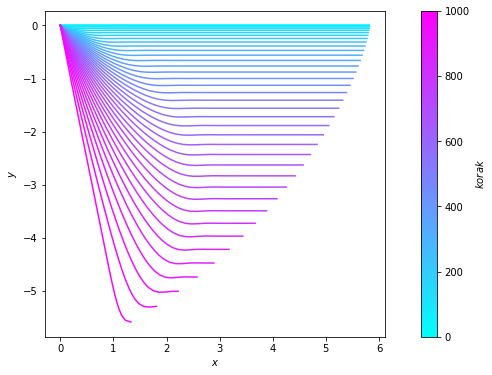

grafi/padvrv-popR-n50-l0.12-m0.2-r0.001-dt0.01-t10.0-freq25.pdf


In [8]:
t = len(sol2[0])

cmap = plt.get_cmap('cool', t)
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(13, 6), sharex=True)

axes.set_ylabel('$y$')

#axes.plot(P0[0], P0[1], color='red', marker='o', label=r'$P_0$', linestyle='')
#axes.plot(P1[0], P1[1], color='blue', marker='o', label=r'$P_1$', linestyle='')

freq = 25

for i in range(t//freq):
    x = x_iz_phi(sol2[0, freq*i], L)
    y = y_iz_phi(sol2[0, freq*i], L)
    axes.plot(x, y, color=cmap(freq*i))

norm = matplotlib.colors.Normalize(vmin=0, vmax=t)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
fig.colorbar(sm, ax=axes, label=r'$korak$')

plt.xlabel('$x$')
#plt.legend()
plt.gca().set_aspect('equal', adjustable='box')

plt.savefig(f'grafi/padvrv-popR-n{len(phi_p)}-l{round(L/len(phi_p), 2)}-m{m}-r{r}-dt{round(timespace_p[1]-timespace_p[0], 2)}-t{timespace_p[-1]}-freq{freq}.pdf')
plt.show()
print(f'grafi/padvrv-popR-n{len(phi_p)}-l{round(L/len(phi_p), 2)}-m{m}-r{r}-dt{round(timespace_p[1]-timespace_p[0], 2)}-t{timespace_p[-1]}-freq{freq}.pdf')

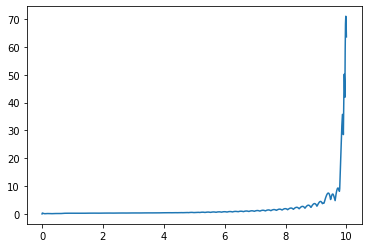

In [9]:
amax = np.zeros_like(timespace_p)
vmax = np.zeros_like(timespace_p)
for i in range(len(amax)):
    amax[i] = max(sol2[2, i])
    vmax[i] = max(sol2[1, i])


plt.plot(timespace_p, amax)
#plt.plot(timespace_p, vmax)
plt.show()

#### Catenary --> $\varphi_i$

a = [2.34770762]
[2.02284866]


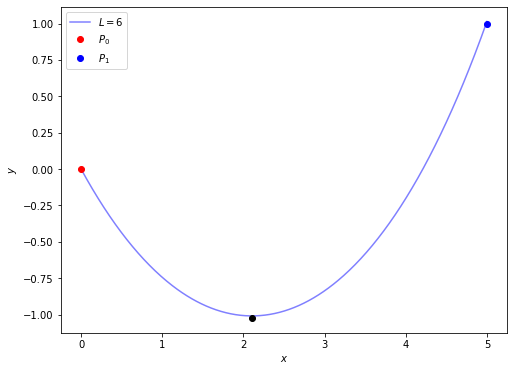

In [10]:
P0 = np.array((0.0, 0.0))   # levo sidrisce
P1 = np.array((5.0, 1.0))   # desno sidrisce
L = 6    # dolzina vrvi
m = 3    # dolzinska gostota mase
g = 1   #teznostni pospesek


d = abs(P0[0] - P1[0])
h = abs(P0[1] - P1[1])

if L <= np.sqrt(d**2 + h**2):
    print('Prekratka vrv')
else:
    pass


def catenary(a):
    return a * np.sinh(d/(2*a)) + np.arctanh(h/L) + a * np.sinh(d/(2*a)) - np.arctanh(h/L) - L

a = fsolve(catenary, 1) # najdemo tapravo krivuljo
print(f'a =', a)

d1 = a * (d/(2*a) + np.arctanh(h/L))
d0 = d - d1

if P1[1] >= P0[1]:
    xi = d0
    xf = d1

elif P1[1] < P0[1]:
    xi = d1
    xf = d0


x = np.linspace(-xi, xf, 500)
y = np.zeros_like(x)

y = a * np.cosh((x)/a)

h_max = a * (math.cosh(d1 / a) - 1)
print(h_max)

y = y - y[0]
x = x + xi

cmap = plt.get_cmap('cool', 3)
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 6), sharex=True)

axes.plot(x, y, color=cmap(1), label=f'$L={L}$')
axes.set_ylabel('$y$')

axes.plot(P0[0], P0[1], color='red', marker='o', label=r'$P_0$', linestyle='')
axes.plot(P1[0], P1[1], color='blue', marker='o', label=r'$P_1$', linestyle='')

axes.plot(xi, max(P1[1], P0[1])-h_max, color='black', marker='o')

plt.xlabel('$x$')
plt.legend()

plt.show()

[-0.78263391 -0.75502786 -0.72668552 -0.69598109 -0.66277958 -0.62869472
 -0.59374364 -0.55614374 -0.51578074 -0.4744724  -0.43226867 -0.38725761
 -0.33938612 -0.29069166 -0.24127734 -0.19125478 -0.14074299 -0.0898671
 -0.03875691  0.01245478  0.06363383  0.11464652  0.16536129  0.21565045
  0.26539164  0.31446932  0.36277587  0.40824829  0.4509292   0.49274592
  0.53364438  0.57357789  0.61075237  0.64528699  0.67894654  0.71171605
  0.74200571  0.76995273  0.79716246  0.82363474  0.84795452  0.87025333
  0.89197765  0.91313228  0.93372295  0.95251493  0.96962243  0.98631361
  0.99912827]
49
[[0.        ]
 [0.09018036]
 [0.18036072]
 [0.27054108]
 [0.37074148]
 [0.47094188]
 [0.57114228]
 [0.67134269]
 [0.78156313]
 [0.89178357]
 [1.00200401]
 [1.11222445]
 [1.23246493]
 [1.35270541]
 [1.47294589]
 [1.59318637]
 [1.71342685]
 [1.83366733]
 [1.95390782]
 [2.0741483 ]
 [2.19438878]
 [2.31462926]
 [2.43486974]
 [2.55511022]
 [2.6753507 ]
 [2.79559118]
 [2.91583166]
 [3.03607214]
 [3.1462

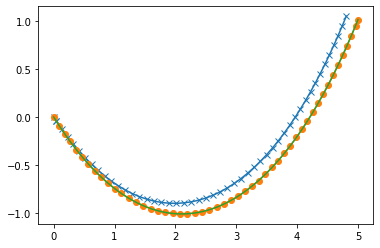

In [11]:
def diskretizacija(x, y, n, L): # x y are same size arrays, n is number of segments wanted, L is the total lenght of chain
    l = L / n
    nov_x = []
    nov_y = []
    konec = len(x) - 1

    i = 0
    j = 0
    k = 0

    while i < konec:
        while np.sqrt((x[j] - x[i])**2 + (y[j] - y[i])**2) < l and j < konec:
            j += 1
            
        
        nov_x.append(x[i])
        nov_y.append(y[i])
        
        i = j

    nov_x.append(x[-1])
    nov_y.append(y[-1])

    return np.array(nov_x), np.array(nov_y)


def xy_to_phi(x, y, n, L):
    l = L / n
    
    x_nov, y_nov = diskretizacija(x, y, n, L)
    phi = np.zeros(len(x_nov)-1)

    for i in range(len(phi)):
        dx = x_nov[i+1] - x_nov[i]
        dy = y_nov[i+1] - y_nov[i]
        phi[i] = np.arctan(dy / dx)

    return phi

n = 50
x_nov, y_nov = diskretizacija(x, y, n, L)
phi = xy_to_phi(x, y, n, L)
print(phi)
print(len(phi))
print(x_nov, y_nov)

plt.plot(x_iz_phi(phi, L), y_iz_phi(phi, L), marker='x')
plt.plot(x_nov, y_nov, marker='o')
plt.plot(x, y)
plt.show()

## Vse skupaj

In [20]:
def diskretizacija(x, y, n, L): # x y are same size arrays, n is number of segments wanted, L is the total lenght of chain
    l = L / n
    nov_x = []
    nov_y = []
    konec = len(x) - 1

    i = 0
    j = 0
    k = 0

    while i < konec:
        while np.sqrt((x[j] - x[i])**2 + (y[j] - y[i])**2) < l and j < konec:
            j += 1
            
        
        nov_x.append(x[i])
        nov_y.append(y[i])
        
        i = j

    nov_x.append(x[-1])
    nov_y.append(y[-1])

    return np.array(nov_x), np.array(nov_y)


def xy_to_phi(x, y, n, L):
    l = L / n
    
    x_nov, y_nov = diskretizacija(x, y, n, L)
    phi = np.zeros(len(x_nov)-1)

    for i in range(len(phi)):
        dx = x_nov[i+1] - x_nov[i]
        dy = y_nov[i+1] - y_nov[i]
        phi[i] = np.arctan(dy / dx)

    return phi



def falling_chain(P0, P1, L, n, t_final, r=0.001, m=0.2, g=1, dt=0.01, freq=25, plot=True, width=13):
    
    d = abs(P0[0] - P1[0])
    h = abs(P0[1] - P1[1])

    if L <= np.sqrt(d**2 + h**2):
        print('Prekratka vrv')
        return None
    else:
        pass

    def catenary(a):
        return a * np.sinh(d/(2*a)) + np.arctanh(h/L) + a * np.sinh(d/(2*a)) - np.arctanh(h/L) - L

    a = fsolve(catenary, 1)

    d1 = a * (d/(2*a) + np.arctanh(h/L))
    d0 = d - d1

    if P1[1] >= P0[1]:
        xi = d0
        xf = d1

    elif P1[1] < P0[1]:
        xi = d1
        xf = d0


    x = np.linspace(-xi, xf, 500)
    y = np.zeros_like(x)

    y = a * np.cosh((x)/a)

    h_max = a * (math.cosh(d1 / a) - 1)



    phi = xy_to_phi(x, y, n, L)
    print(phi)
    
    omega = np.zeros_like(phi)
    alpha = np.zeros_like(phi)


    def cas_raz_cat(t, omega):
        phi = sol[0, t]
        n = len(phi)
        l = L / n
        mc = MC(phi)
        ms = MS(phi)
        q = qc(phi)

        inv = np.linalg.inv(mc)
        
        res = - np.dot(inv, np.dot(ms, np.square(omega))) - np.dot(inv, q)

        popravek = np.zeros_like(phi)
        for i in range(n):
            if i == 0:
                popravek[i] = r / (m*l**2) * (omega[i+1] - 2 * omega[i] + omega[i])
            elif i == n-1:
                popravek[i] = r / (m*l**2) * (omega[i] - 2 * omega[i] + omega[i-1])
            else:
                popravek[i] = r / (m*l**2) * (omega[i+1] - 2 * omega[i] + omega[i-1])

        return res + np.dot(inv, popravek)
    

    timespace = np.linspace(0, t_final, int(t_final / dt))

    sol = np.zeros([3, len(timespace), len(phi)])
    sol[0, 0] = phi
    sol[1, 0] = omega
    sol[2, 0] = alpha


    for t in range(len(timespace)-1):
        dt = timespace[t+1] - timespace[t]

        sol[0, t+1] = sol[0, t] + sol[1, t] * dt
        
        k1 = dt * cas_raz_cat(t, sol[1, t])
        k2 = dt * cas_raz_cat(t, sol[1, t] + 0.5 * k1)
        k3 = dt * cas_raz_cat(t+1, sol[1, t] + 0.5 * k2)
        k4 = dt * cas_raz_cat(t+1, sol[1, t] + k3)

        sol[1, t+1] = sol[1, t] + (k1 + 2.0 * (k2+k3) + k4) / 6.0

        sol[2, t+1] = (sol[1, t+1] - sol[1, t]) / dt


    if plot == True:
        cmap = plt.get_cmap('cool', len(timespace))
        fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(width, 6), sharex=True)

        axes.set_ylabel('$y$')


        freq = 25

        for i in range(len(timespace)//freq):
            x = x_iz_phi(sol[0, freq*i], L)
            y = y_iz_phi(sol[0, freq*i], L)
            axes.plot(x, y, color=cmap(freq*i))

            if i == 0:
                axes.plot(x[0], y[0], color='red', marker='o', label=r'$P_0$', linestyle='')
                axes.plot(x[-1], y[-1], color='blue', marker='o', label=r'$P_1$', linestyle='')
                print((x[-1], y[-1]))


        norm = matplotlib.colors.Normalize(vmin=0, vmax=t_final)
        sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
        sm.set_array([])
        fig.colorbar(sm, ax=axes, label=r'$t$')

        plt.xlabel('$x$')
        plt.legend()
        plt.gca().set_aspect('equal', adjustable='box')
        #plt.xlim(-1, 1)

        plt.savefig(f'grafi/falling_chain_P.{P1[0]}-{P1[1]}_L.{L}_n.{len(phi)}_t.{t_final}_r.{r}_m.{m}_g.{g}_dt.{round(dt, 4)}_freq.{freq}.pdf')
        plt.show()
        print(f'grafi/falling_chain_P.{P1[0]}-{P1[1]}_L.{L}_n.{len(phi)}_t.{t_final}_r.{r}_m.{m}_g.{g}_dt.{round(dt, 4)}_freq.{freq}.pdf')

    return sol

[-1.34015214 -1.32996252 -1.31933186 -1.30711619 -1.29311874 -1.27839844
 -1.26160823 -1.2424697  -1.22219195 -1.19915066 -1.17295725 -1.14323725
 -1.10948296 -1.07120843 -1.02553923 -0.97124556 -0.90690697 -0.83093568
 -0.74164553 -0.63393158 -0.50545613 -0.35895807 -0.19534323 -0.02184278
  0.15231776  0.3177601   0.46685075  0.59830294  0.71234277  0.80709121
  0.88509655  0.9512603   1.00716135  1.05422647  1.09572386  1.13225098
  1.1626908   1.18952632  1.21313818  1.23392214  1.25354178  1.27075663
  1.28585105  1.30020574  1.31385416  1.32576417  1.3361281   1.34311097]
(2.9692671611457957, 0.14712185086266658)


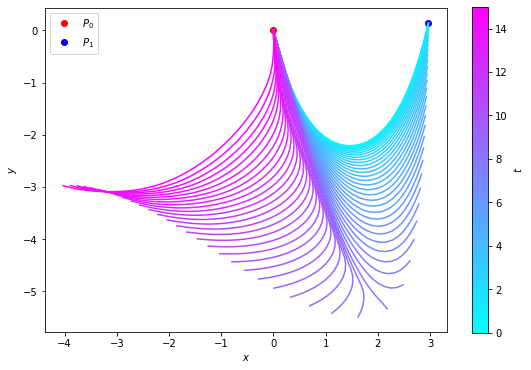

grafi/falling_chain_P.3.0-0.0_L.6_n.48_t.15_r.0.0005_m.0.2_g.1_dt.0.01_freq.25.pdf


In [68]:
P0 = np.array([0.0, 0.0])
P1 = np.array([1.0, -0.20])
P3 = np.array([3.0, -0.15])
P5 = np.array([5.0, -0.05])
P6 = np.array([5.99, 0.0])
P1_v = np.array([3.0, -2.0])
P2_v = np.array([3.0, 0.0])
P3_v = np.array([3.0, 2.0])
P4_v = np.array([3.0, 4.0])

L = 6
n = 50
t_final = 15


fc = falling_chain(P0, P2_v, L, n, t_final, r=0.0005, m=0.2, g=1, dt=0.01, freq=25, width=9)

#### Hitrost ob koncu vrvi - horizonatalno spreminjanje položaja

[-1.52773174 -1.52570411 -1.52358108 -1.52135817 -1.51863585 -1.51533643
 -1.51182853 -1.50809902 -1.50413397 -1.49937953 -1.49369129 -1.48755095
 -1.48024147 -1.47152416 -1.46114828 -1.44782752 -1.43077529 -1.40892504
 -1.37941569 -1.33763506 -1.27395832 -1.1646525  -0.94722385 -0.43043056
  0.4110943   0.9398922   1.16254107  1.27239588  1.33640099  1.37839978
  1.40806429  1.43002991  1.44717242  1.46056384  1.47099484  1.47975849
  1.48775454  1.49445885  1.50009057  1.50479774  1.50872337  1.51241578
  1.51588878  1.51915537  1.5218506   1.52405138  1.52545981]
(1.018867250081011, -0.06681203264025573)


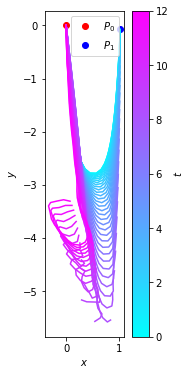

grafi/falling_chain_P.1.0--0.2_L.6_n.47_t.12_r.0.0005_m.0.2_g.1_dt.0.01_freq.25.pdf
[-0.90139429 -0.87992233 -0.85787788 -0.83383004 -0.80764696 -0.78072696
 -0.75306934 -0.72467561 -0.69391732 -0.66065978 -0.62651983 -0.5915149
 -0.55386009 -0.51344177 -0.47208078 -0.42982746 -0.38476829 -0.33685122
 -0.28811635 -0.23866728 -0.18861603 -0.13808198 -0.08719055 -0.03607171
  0.01514161  0.06631524  0.11731554  0.16801112  0.21827451  0.26798371
  0.31702353  0.36528683  0.41071314  0.45334618  0.49511174  0.53595616
  0.5758332   0.61295185  0.6474319   0.68103582  0.7137489   0.74398444
  0.77187995  0.79903808  0.82545882  0.84973013  0.87198358  0.89231909]
(4.890228427656353, 0.009639409370674479)


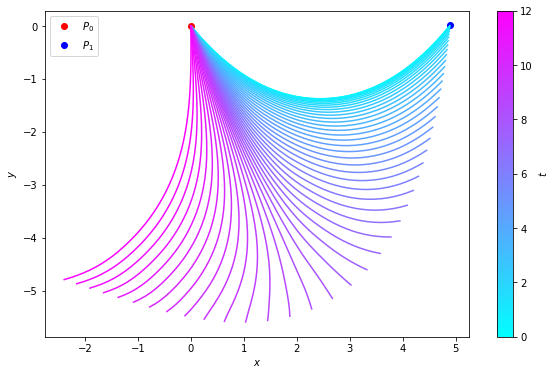

grafi/falling_chain_P.5.0--0.05_L.6_n.48_t.12_r.0.0005_m.0.2_g.1_dt.0.01_freq.25.pdf


In [72]:
P0 = np.array([0.0, 0.0])
P1 = np.array([1.0, -0.20])
P3 = np.array([3.0, -0.15])
P5 = np.array([5.0, -0.05])
P6 = np.array([5.99, 0.0])


L = 6
n = 50
t_final = 12
dt = 0.01
tspace = np.linspace(0, t_final, int(t_final / dt))


fc1 = falling_chain(P0, P1, L, n, t_final, r=0.0005, m=0.2, g=1, dt=0.01, freq=25, plot=True, width=3)
fc3 = falling_chain(P0, P3, L, n, t_final, r=0.0005, m=0.2, g=1, dt=0.01, freq=25, plot=True, width=7)
fc5 = falling_chain(P0, P5, L, n, t_final, r=0.0005, m=0.2, g=1, dt=0.01, freq=25, plot=True, width=10)
fc6 = falling_chain(P0, P6, L, n, t_final, r=0.0005, m=0.2, g=1, dt=0.01, freq=25, plot=True, width=10)

In [16]:
def hitrost_pos(sol, dt=0.01):
    t_final = len(sol[0])

    x = np.zeros([t_final, len(sol[0, 0])+1])
    y = np.zeros([t_final, len(sol[0, 0])+1])
    vx = np.zeros([t_final, len(sol[0, 0])+1])
    vy = np.zeros([t_final, len(sol[0, 0])+1])

    x[0] = x_iz_phi(sol[0, 0], L)
    y[0] = y_iz_phi(sol[0, 0], L)

    for i in range(t_final-1):
        x[i+1] = x_iz_phi(sol[0, i], L)
        y[i+1] = y_iz_phi(sol[0, i], L)

        vx[i] = (x[i+1] - x[i]) / dt
        vy[i] = (y[i+1] - y[i]) / dt


    return x, y, vx, vy

x1, y1, vx1, vy1 = hitrost_pos(fc1)
x3, y3, vx3, vy3 = hitrost_pos(fc3)
x5, y5, vx5, vy5 = hitrost_pos(fc5)
x6, y6, vx6, vy6 = hitrost_pos(fc6)

v1 = np.sqrt(vx1**2 + vy1**2)
v3 = np.sqrt(vx3**2 + vy3**2)
v5 = np.sqrt(vx5**2 + vy5**2)
v6 = np.sqrt(vx6**2 + vy6**2)

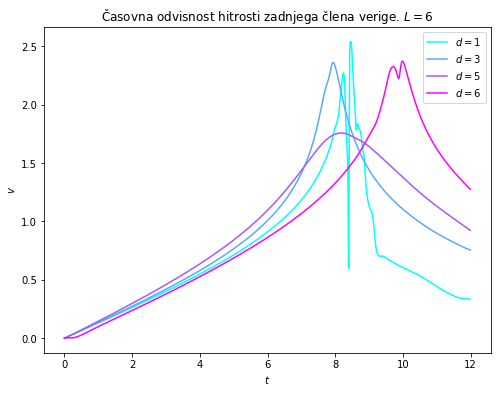

In [17]:
cmap = plt.get_cmap('cool', 4)
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 6), sharex=True)
clen = -1

axes.plot(tspace[:-1], v1[:-1, clen], color=cmap(0), label=f'$d={1}$')
axes.plot(tspace[:-1], v3[:-1, clen], color=cmap(1), label=f'$d={3}$')
axes.plot(tspace[:-1], v5[:-1, clen], color=cmap(2), label=f'$d={5}$')
axes.plot(tspace[:-1], v6[:-1, clen], color=cmap(3), label=f'$d={6}$')


axes.set_ylabel('$v$')
plt.xlabel('$t$')
plt.legend()
plt.title('Časovna odvisnost hitrosti zadnjega člena verige. $L=6$')
plt.savefig(f'grafi/hitrost_siroko.pdf')

plt.show()

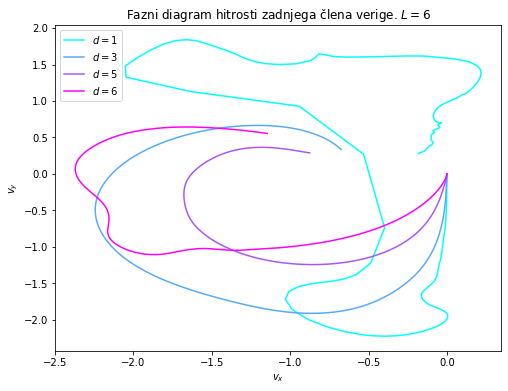

In [30]:
cmap = plt.get_cmap('cool', 4)
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 6), sharex=True)
clen = -1

axes.plot(vx1[:-1, clen], vy1[:-1, clen], color=cmap(0), label=f'$d={1}$')
axes.plot(vx3[:-1, clen], vy3[:-1, clen], color=cmap(1), label=f'$d={3}$')
axes.plot(vx5[:-1, clen], vy5[:-1, clen], color=cmap(2), label=f'$d={5}$')
axes.plot(vx6[:-1, clen], vy6[:-1, clen], color=cmap(3), label=f'$d={6}$')

axes.set_ylabel('$v_y$')
plt.xlabel('$v_x$')
plt.legend()
plt.title('Fazni diagram hitrosti zadnjega člena verige. $L=6$')
plt.savefig(f'grafi/hitrost_siroko_xy.pdf')

plt.show()

#### Hitrost ob koncu vrvi - vertikalno spreminjanje položaja

[-1.40804839 -1.40229389 -1.39633792 -1.39017364 -1.38379401 -1.37719177
 -1.37035946 -1.3623943  -1.35317127 -1.34354681 -1.33350439 -1.32302689
 -1.31098674 -1.29718971 -1.28267933 -1.26742191 -1.2500221  -1.23019296
 -1.20765762 -1.182034   -1.15295327 -1.11991487 -1.08243829 -1.03770034
 -0.98448178 -0.92136814 -0.84676833 -0.7589763  -0.65630381 -0.53361108
 -0.3891567  -0.22707135 -0.05427028  0.1201682   0.29100835  0.44955424
  0.5858836   0.70096152  0.79668727  0.87556802  0.94252054  0.99911837
  1.04678999  1.08883597  1.12585607  1.15848531  1.18720094  1.21249935
  1.23474607  1.24880407]
(2.8274119447180013, -1.7688455722543655)


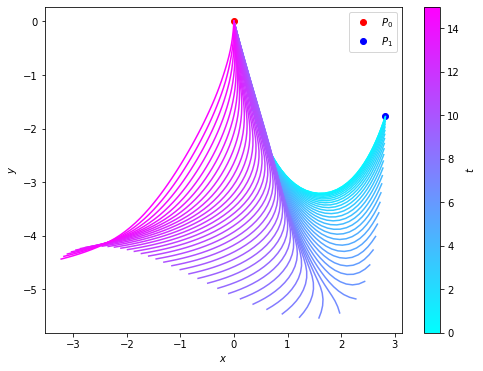

grafi/falling_chain_P.3.0--2.0_L.6_n.50_t.15_r.0.0005_m.0.2_g.1_dt.0.01_freq.25.pdf
[-1.34015214 -1.32996252 -1.31933186 -1.30711619 -1.29311874 -1.27839844
 -1.26160823 -1.2424697  -1.22219195 -1.19915066 -1.17295725 -1.14323725
 -1.10948296 -1.07120843 -1.02553923 -0.97124556 -0.90690697 -0.83093568
 -0.74164553 -0.63393158 -0.50545613 -0.35895807 -0.19534323 -0.02184278
  0.15231776  0.3177601   0.46685075  0.59830294  0.71234277  0.80709121
  0.88509655  0.9512603   1.00716135  1.05422647  1.09572386  1.13225098
  1.1626908   1.18952632  1.21313818  1.23392214  1.25354178  1.27075663
  1.28585105  1.30020574  1.31385416  1.32576417  1.3361281   1.34311097]
(2.9692671611457957, 0.14712185086266658)


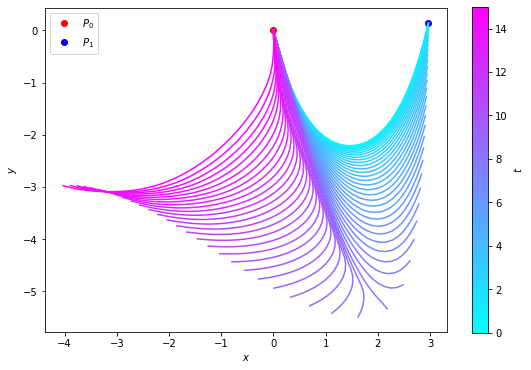

grafi/falling_chain_P.3.0-0.0_L.6_n.48_t.15_r.0.0005_m.0.2_g.1_dt.0.01_freq.25.pdf
[-1.24327349 -1.22304342 -1.2000559  -1.17392303 -1.14427091 -1.11059262
 -1.07240275 -1.02683229 -0.97265251 -0.90844351 -0.83261709 -0.74348484
 -0.63594199 -0.50764005 -0.36129592 -0.19779375 -0.02434087  0.14984754
  0.31538607  0.46461913  0.59623812  0.71045161  0.80536319  0.88351444
  0.94980952  1.0058265   1.05299246  1.09458103  1.13119005  1.1616992
  1.18859662  1.21380707  1.23597576  1.25547993  1.27259284  1.28759744
  1.30186635  1.31543289  1.32727122  1.33757259  1.34744581  1.35690775
  1.36597471  1.37380485  1.38052118  1.38701119  1.39328225  1.39934151
  1.40519591  1.40945028]
(2.8183787407382295, 2.0052341200379575)


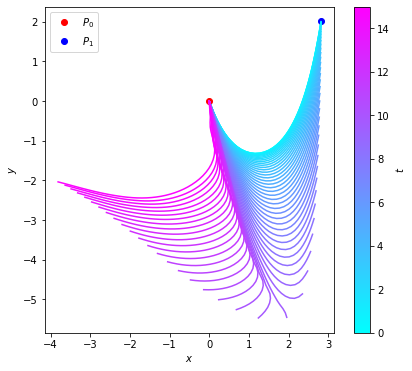

grafi/falling_chain_P.3.0-2.0_L.6_n.50_t.15_r.0.0005_m.0.2_g.1_dt.0.01_freq.25.pdf
[-1.05330707 -1.00616681 -0.95017938 -0.88391776 -0.80580369 -0.71093366
 -0.59676439 -0.46518786 -0.31599101 -0.1504769   0.02370451  0.19716961
  0.36070056  0.50708396  0.63543014  0.74301658  0.83218906  0.90805237
  0.97229437  1.02650315  1.07209875  1.11031018  1.14400782  1.17367721
  1.1998255   1.22282671  1.24306891  1.26217366  1.27893406  1.29362812
  1.3076005   1.31979422  1.33040572  1.34057693  1.35032509  1.35966692
  1.36861856  1.37634894  1.38297957  1.38938668  1.39557754  1.40155922
  1.40733858  1.41292228  1.41831678  1.42288344  1.42669219  1.43040353
  1.4340199   1.43754367  1.44097719  1.44432273  1.44758249  1.45075866
  1.45385333  1.45686857  1.4598064   1.46266877  1.4654576   1.46817476]
(2.2958785903742847, 3.8637042568625457)


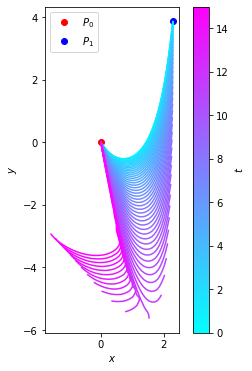

grafi/falling_chain_P.3.0-4.0_L.6_n.60_t.15_r.0.0005_m.0.2_g.1_dt.0.01_freq.25.pdf


In [21]:
P0 = np.array([0.0, 0.0])
P1_v = np.array([3.0, -2.0])
P2_v = np.array([3.0, 0.0])
P3_v = np.array([3.0, 2.0])
P4_v = np.array([3.0, 4.0])

L_v = 6
n_v = 50
t_final_v = 15
dt = 0.01
tspace_v = np.linspace(0, t_final_v, int(t_final_v / dt))
w_v = 8

vert1 = falling_chain(P0, P1_v, L_v, n_v, t_final_v, r=0.0005, m=0.2, g=1, dt=0.01, freq=25, plot=True, width=8)
vert2 = falling_chain(P0, P2_v, L_v, n_v, t_final_v, r=0.0005, m=0.2, g=1, dt=0.01, freq=25, plot=True, width=9)
vert3 = falling_chain(P0, P3_v, L_v, n_v, t_final_v, r=0.0005, m=0.2, g=1, dt=0.01, freq=25, plot=True, width=7)
vert4 = falling_chain(P0, P4_v, L_v, n_v, t_final_v, r=0.0005, m=0.2, g=1, dt=0.01, freq=25, plot=True, width=5)

In [16]:
def hitrost_pos(sol, dt=0.01):
    t_final = len(sol[0])

    x = np.zeros([t_final, len(sol[0, 0])+1])
    y = np.zeros([t_final, len(sol[0, 0])+1])
    vx = np.zeros([t_final, len(sol[0, 0])+1])
    vy = np.zeros([t_final, len(sol[0, 0])+1])

    x[0] = x_iz_phi(sol[0, 0], L)
    y[0] = y_iz_phi(sol[0, 0], L)

    for i in range(t_final-1):
        x[i+1] = x_iz_phi(sol[0, i], L)
        y[i+1] = y_iz_phi(sol[0, i], L)

        vx[i] = (x[i+1] - x[i]) / dt
        vy[i] = (y[i+1] - y[i]) / dt


    return x, y, vx, vy

x1_v, y1_v, vx1_v, vy1_v = hitrost_pos(vert1)
x2_v, y2_v, vx2_v, vy2_v = hitrost_pos(vert2)
x3_v, y3_v, vx3_v, vy3_v = hitrost_pos(vert3)
x4_v, y4_v, vx4_v, vy4_v = hitrost_pos(vert4)

v1_v = np.sqrt(vx1_v**2 + vy1_v**2)
v2_v = np.sqrt(vx2_v**2 + vy2_v**2)
v3_v = np.sqrt(vx3_v**2 + vy3_v**2)
v4_v = np.sqrt(vx4_v**2 + vy4_v**2)

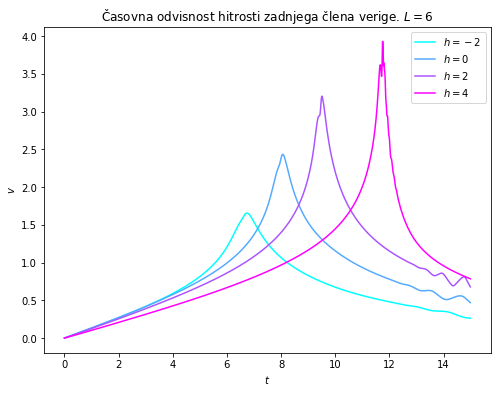

In [17]:
tspace_v = np.linspace(0, t_final_v, int(t_final_v / dt))

cmap = plt.get_cmap('cool', 4)
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 6), sharex=True)
clen = -1

axes.plot(tspace_v[:-1], v1_v[:-1, clen], color=cmap(0), label=f'$h={-2}$')
axes.plot(tspace_v[:-1], v2_v[:-1, clen], color=cmap(1), label=f'$h={0}$')
axes.plot(tspace_v[:-1], v3_v[:-1, clen], color=cmap(2), label=f'$h={2}$')
axes.plot(tspace_v[:-1], v4_v[:-1, clen], color=cmap(3), label=f'$h={4}$')


axes.set_ylabel('$v$')
plt.xlabel('$t$')
plt.legend()
plt.title('Časovna odvisnost hitrosti zadnjega člena verige. $L=6$')
plt.savefig(f'grafi/hitrost_visoko.pdf')

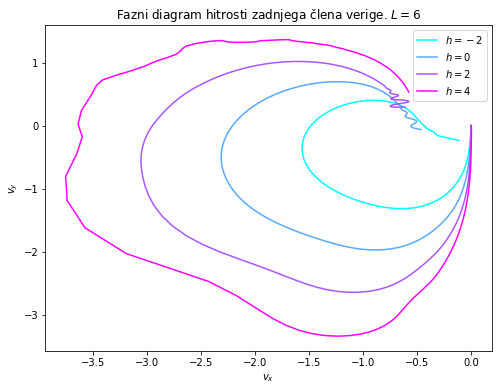

In [18]:
cmap = plt.get_cmap('cool', 4)
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 6), sharex=True)
clen = -1

axes.plot(vx1_v[:-1, clen], vy1_v[:-1, clen], color=cmap(0), label=f'$h={-2}$')
axes.plot(vx2_v[:-1, clen], vy2_v[:-1, clen], color=cmap(1), label=f'$h={0}$')
axes.plot(vx3_v[:-1, clen], vy3_v[:-1, clen], color=cmap(2), label=f'$h={2}$')
axes.plot(vx4_v[:-1, clen], vy4_v[:-1, clen], color=cmap(3), label=f'$h={4}$')

axes.set_ylabel('$v_y$')
plt.xlabel('$v_x$')
plt.legend()
plt.title('Fazni diagram hitrosti zadnjega člena verige. $L=6$')
plt.savefig(f'grafi/hitrost_visoko_xy.pdf')

plt.show()

#### Graf $v_{max}(d)$

In [53]:
k = 20
start = 5
pos = np.linspace(0, L, k)
v_max = np.zeros(k-start-1)
t_final = 12

for i in range(start, k-1):
    pf = np.array([pos[i], 0.0])
    graf = falling_chain(P0, pf, L, n, t_final, r=0.0005, m=0.2, g=1, dt=0.01, freq=25, plot=False)
    x, y, vx, vy = hitrost_pos(graf)
    v = np.sqrt(vx**2 + vy**2)
    v_max[i-start] = np.max(v)
    print(i)

# tole se racuna ene 20 minut tko da ce se da cim manjkrat

[-1.48636287 -1.48193838 -1.47728268 -1.47238379 -1.46722914 -1.46111464
 -1.45389036 -1.44619256 -1.43715144 -1.42653177 -1.41507457 -1.40165733
 -1.38590856 -1.36744481 -1.34431485 -1.31539705 -1.27922782 -1.23183804
 -1.16717647 -1.07317847 -0.92954953 -0.70414931 -0.34736541  0.1223412
  0.54926785  0.83669447  1.01561983  1.1307071   1.20772478  1.26227082
  1.3038804   1.33553925  1.35955165  1.3799585   1.39729837  1.41208577
  1.42468208  1.43543705  1.44459352  1.45238963  1.45970626  1.46589898
  1.47111961  1.47608124  1.48079659  1.48527779  1.48795636]
5
[ 1.46054954  1.45527635  1.44975211  1.44396505  1.43713191  1.42910165
  1.42059237  1.41065542  1.39905922  1.38663216  1.37217955  1.35534567
  1.33576923  1.31146761  1.28303242  1.2497656   1.20664375  1.15087533
  1.07898639  0.9799398   0.83680019  0.6291671   0.34025511 -0.01765994
 -0.37330658 -0.65733283 -0.85609131 -0.99286216 -1.08993098 -1.16031965
 -1.21489186 -1.25707163 -1.28960275 -1.3159085  -1.33847964 

<ipython-input-26-4f9d193c5bae>:96: RuntimeWarning: overflow encountered in square
  res = - np.dot(inv, np.dot(ms, np.square(omega))) - np.dot(inv, q)


8
[-1.08404461 -1.05532442 -1.02357709 -0.98853411 -0.94820675 -0.90195394
 -0.8509303  -0.7947801  -0.73098676 -0.65882258 -0.57761757 -0.48683897
 -0.38619672 -0.27577023 -0.15894723 -0.03704867  0.08540741  0.20380042
  0.31936577  0.42806499  0.52670004  0.61533301  0.69436512  0.76440979
  0.82619108  0.88046961  0.92799289  0.96946474  1.00706667  1.04110637
  1.07192711  1.09193317]


c:\Users\lotri\AppData\Local\Programs\Python\Python38\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


9
[-1.31845501 -1.30780582 -1.2955929  -1.28162963 -1.26697873 -1.25160963
 -1.23412469 -1.21425179 -1.19325881 -1.16947845 -1.14253702 -1.11207818
 -1.07762082 -1.03871042 -0.99249404 -0.93782797 -0.87340833 -0.79780013
 -0.7095084  -0.60711413 -0.48949951 -0.35617529 -0.20768728 -0.05018683
  0.10856953  0.26462555  0.41047825  0.54044836  0.65438344  0.74997141
  0.82934553  0.89718817  0.95490228  1.00605957  1.05129719  1.08936336
  1.12305888  1.1528337   1.17916247  1.20239636  1.22290282  1.24231177
  1.2593859   1.27439202  1.28869534  1.30232598  1.31424692  1.32155206]
10
[-1.26948645 -1.25556694 -1.2410268  -1.22584157 -1.20864445 -1.1891971
 -1.16875922 -1.14572894 -1.11978568 -1.09237402 -1.06158926 -1.02701388
 -0.98826211 -0.94260874 -0.89146759 -0.83433162 -0.76786385 -0.69095485
 -0.60252837 -0.50167167 -0.39133539 -0.27207385 -0.14111638 -0.00382669
  0.13353517  0.26469545  0.38425211  0.49495108  0.59621167  0.68504547
  0.76234658  0.82917972  0.88664811  0.938100

[2.42942458 2.43502714 2.51668744 2.48221035 2.41976721 2.37250062
 2.30155712 2.16416214 2.0407195  1.94228152 1.84044295 1.77161685
 1.79286495 1.97377082]
grafi/vmax_od_d_s-1.5789473684210527_f-6.0_k-14.pdf


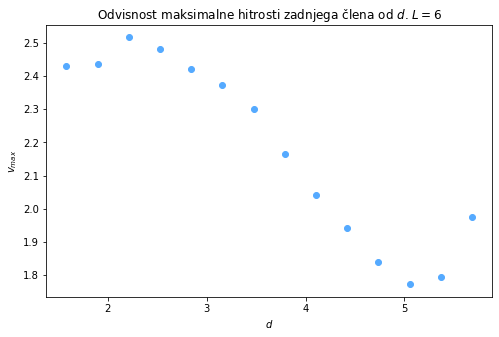

In [64]:
cmap = plt.get_cmap('cool', 4)
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 5), sharex=True)
clen = -1

v_max = np.array([2.42942458, 2.43502714, 2.51668744, 2.48221035, 2.41976721, 2.37250062, 2.30155712, 2.16416214, 2.0407195,  1.94228152, 1.84044295, 1.77161685, 1.79286495, 1.97377082])

axes.plot(pos[start:-1], v_max, color=cmap(1), linestyle='', marker='o')


axes.set_ylabel('$v_{max}$')
plt.xlabel('$d$')
#plt.legend()
plt.title('Odvisnost maksimalne hitrosti zadnjega člena od $d$. $L=6$')
plt.savefig(f'grafi/vmax_od_d_s-{pos[start]}_f-{pos[-1]}_k-{len(v_max)}.pdf')
print(v_max)

print(f'grafi/vmax_od_d_s-{pos[start]}_f-{pos[-1]}_k-{len(v_max)}.pdf')


### Vertikalni zacetni pogoj - gor-dol al pa sam na gor

[-1.3099232  -1.07541692  0.0121809   1.08548869  1.31534755  1.39802655
  1.44034648  1.4662229   1.48374123  1.49608097  1.50519748  1.5123143
  1.51826624  1.5232437   1.527424    1.5309282   1.53387128  1.53659719
  1.53887527  1.54077492  1.54256154  1.54424187  1.54582222  1.54712606
  1.54819067  1.54920741  1.55017842  1.55110576  1.5519914   1.55283721
  1.55364498  1.55428949  1.55478824  1.55527193  1.55574101  1.55619591
  1.55663707  1.55706489  1.5574798   1.55788216  1.55827237  1.55865079
  1.55901778  1.55937368  1.55971882  1.56005354  1.56037814  1.56069294
  1.56099822  1.56129428  1.56158139]


<ipython-input-114-ae86c7fd620d>:96: RuntimeWarning: overflow encountered in square
  res = - np.dot(inv, np.dot(ms, np.square(omega))) - np.dot(inv, q)


(0.4341737538065902, 5.4628703740793645)


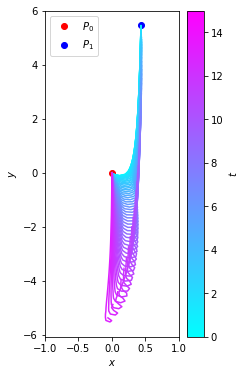

grafi/falling_chain_P.1.0-5.5_L.6_n.51_t.15_r.0.001_m.0.2_g.1_dt.0.01_freq.25.pdf


In [122]:
P0 = np.array([0.0, 0.0])
P1 = np.array([1.0, 5.5])
n = 25

vert_up = falling_chain(P0, P1, 6, n, 15, r=0.001, width=3, freq=100)

In [127]:
n = 50 # število členov
k = 1 # število členov pri obratu
t_final = 12
dt = 0.01
L = 6
r = 0.001

phi = np.zeros(n)
for i in range(n):
    if i < (n-k)/2:
        phi[i] = - np.pi / 2
    elif i > (n+k)/2:
        phi[i] = np.pi / 2
    else:
        phi[i] = -np.pi / 2 + np.pi/k * (i - (n-k)/2)

print(phi)
#plt.plot(x_iz_phi(phi, L), y_iz_phi(phi, L), marker='x')


omega = np.zeros_like(phi)
alpha = np.zeros_like(phi)


def cas_raz_cat(t, omega):
    phi = sol[0, t]
    n = len(phi)
    l = L / n
    mc = MC(phi)
    ms = MS(phi)
    q = qc(phi)

    inv = np.linalg.inv(mc)
    
    res = - np.dot(inv, np.dot(ms, np.square(omega))) - np.dot(inv, q)

    popravek = np.zeros_like(phi)
    for i in range(n):
        if i == 0:
            popravek[i] = r / (m*l**2) * (omega[i+1] - 2 * omega[i] + omega[i])
        elif i == n-1:
            popravek[i] = r / (m*l**2) * (omega[i] - 2 * omega[i] + omega[i-1])
        else:
            popravek[i] = r / (m*l**2) * (omega[i+1] - 2 * omega[i] + omega[i-1])

    return res + np.dot(inv, popravek)


timespace = np.linspace(0, t_final, int(t_final / dt))

sol = np.zeros([3, len(timespace), len(phi)])
sol[0, 0] = phi
sol[1, 0] = omega
sol[2, 0] = alpha


for t in range(len(timespace)-1):
    dt = timespace[t+1] - timespace[t]

    sol[0, t+1] = sol[0, t] + sol[1, t] * dt
    
    k1 = dt * cas_raz_cat(t, sol[1, t])
    k2 = dt * cas_raz_cat(t, sol[1, t] + 0.5 * k1)
    k3 = dt * cas_raz_cat(t+1, sol[1, t] + 0.5 * k2)
    k4 = dt * cas_raz_cat(t+1, sol[1, t] + k3)

    sol[1, t+1] = sol[1, t] + (k1 + 2.0 * (k2+k3) + k4) / 6.0

    sol[2, t+1] = (sol[1, t+1] - sol[1, t]) / dt

[-1.57079633 -1.57079633 -1.57079633 -1.57079633 -1.57079633 -1.57079633
 -1.57079633 -1.57079633 -1.57079633 -1.57079633 -1.57079633 -1.57079633
 -1.57079633 -1.57079633 -1.57079633 -1.57079633 -1.57079633 -1.57079633
 -1.57079633 -1.57079633 -1.57079633 -1.57079633 -1.57079633 -1.57079633
 -1.57079633  0.          1.57079633  1.57079633  1.57079633  1.57079633
  1.57079633  1.57079633  1.57079633  1.57079633  1.57079633  1.57079633
  1.57079633  1.57079633  1.57079633  1.57079633  1.57079633  1.57079633
  1.57079633  1.57079633  1.57079633  1.57079633  1.57079633  1.57079633
  1.57079633  1.57079633]


<ipython-input-127-3cf86498a62d>:35: RuntimeWarning: overflow encountered in square
  res = - np.dot(inv, np.dot(ms, np.square(omega))) - np.dot(inv, q)


(0.1200000000000005, -0.06000000000000005)


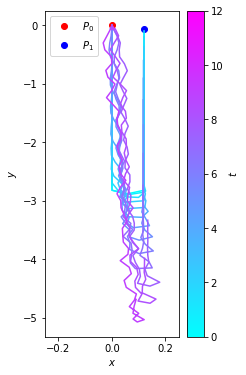

grafi/vertfall_L.6_n.50_k.1_t.12_r.0.001_m.3_g.1_dt.0.01_freq.75.pdf


In [135]:
cmap = plt.get_cmap('cool', len(timespace))
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(3, 6), sharex=True)

axes.set_ylabel('$y$')


freq = 75

for i in range(len(timespace)//freq):
    x = x_iz_phi(sol[0, freq*i], L)
    y = y_iz_phi(sol[0, freq*i], L)
    axes.plot(x, y, color=cmap(freq*i))

    if i == 0:
        axes.plot(x[0], y[0], color='red', marker='o', label=r'$P_0$', linestyle='')
        axes.plot(x[-1], y[-1], color='blue', marker='o', label=r'$P_1$', linestyle='')
        print((x[-1], y[-1]))


norm = matplotlib.colors.Normalize(vmin=0, vmax=t_final)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
fig.colorbar(sm, ax=axes, label=r'$t$')

plt.xlabel('$x$')
plt.legend()
#plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(-0.25, 0.25)

plt.savefig(f'grafi/vertfall_L.{L}_n.{len(phi)}_k.{k}_t.{t_final}_r.{r}_m.{m}_g.{g}_dt.{round(dt, 4)}_freq.{freq}.pdf')
plt.show()
print(f'grafi/vertfall_L.{L}_n.{len(phi)}_k.{k}_t.{t_final}_r.{r}_m.{m}_g.{g}_dt.{round(dt, 4)}_freq.{freq}.pdf')